In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.performance_dashboard

In [3]:
%matplotlib inline
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [4]:
import ipywidgets as widgets
from IPython.display import display

components = db.benchmark_results.distinct("component")
component_selection = widgets.Dropdown(description="Component", options=components, value='Ocean')
display(component_selection)

In [5]:
from IPython.display import Javascript, display
# from ipywidgets import widgets

def run_all(ev):
    global component
    component = component_selection.value   
    display(Javascript('IPython.notebook.execute_cells_below()'))

component = component_selection.value
button = widgets.Button(description="Update below")
button.on_click(run_all)
display(button)

In [6]:
import numpy as np
import seaborn as sns

def render_plot(component, benchmark_name, benchstep_name, df):
    benchs = df[['version', 'revision', 'value']]
    sns.set(style="ticks")
    ax = sns.lmplot(x="revision", y="value", data=df, hue='version', fit_reg=False)
    title = "'{}', '{}', '{}'".format(component, benchmark_name, benchstep_name)
    print(title)
    ax.fig.suptitle(title)
    # ax.set_yscale("log")

In [7]:
from IPython.display import clear_output

def bench_generator():
    benchmark_names = db.benchmark_results.find({"component": component}).distinct("benchmark_name")
    for benchmark_name in benchmark_names:
        benchstep_names = db.benchmark_results.find({"component": component,
                                                     "benchmark_name": benchmark_name
                                                    }
                                                   ).distinct("benchstep_name")
        for benchstep_name in benchstep_names:
            versions = db.benchmark_results.find({"component": component,
                                                  "benchmark_name": benchmark_name,
                                                  "benchstep_name": benchstep_name,
                                                 }
                                                ).distinct("version")
            versions.sort(reverse=True)


            query = {"component": component, "benchmark_name": benchmark_name, 
                     "benchstep_name": benchstep_name, "version": {"$in": versions}}
            df = pd.DataFrame.from_records(db.benchmark_results.find(query))
            clear_output()
            render_plot(component, benchmark_name, benchstep_name, df)
            yield
    

In [8]:
import ipywidgets as widgets

benchs = bench_generator()

previous_bench = widgets.Button(description='<', disabled=False,
                    button_style='', tooltip='Previous', icon='check')
play = widgets.Play(value=0, min=0, max=200000, step=1, description="Press play", disabled=False)
next_bench = widgets.Button(description='>', disabled=False, button_style='', tooltip='Next', icon='check')

def on_button_clicked(b):
    global benchs
    next(benchs)

next_bench.on_click(on_button_clicked)


'Ocean', 'BenchCore_RpcConnectionSyncInvoke', 'DoSyncCalls'


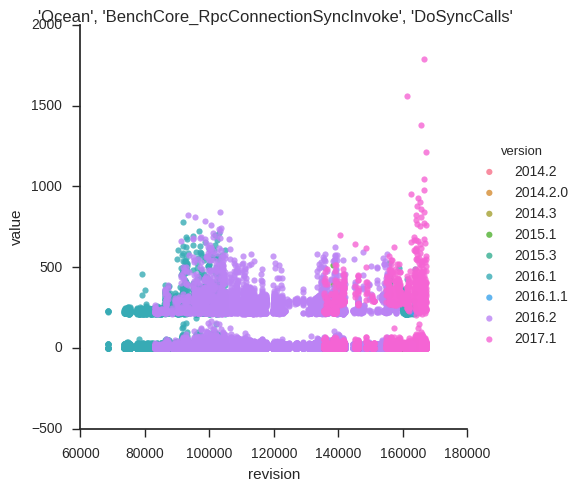

In [9]:
widgets.HBox([previous_bench, play, next_bench])

In [10]:
component, benchmark_name, benchstep_name = 'Ocean', 'ocean_bench_conversion_one_value', 'Unit converter creation + One double value conversion'

query = {"component": component, "benchmark_name": benchmark_name, 
         "benchstep_name": benchstep_name}
df = pd.DataFrame.from_records(db.benchmark_results.find(query))
print(df)

                           _id                    benchmark_name  \
0     583c6b2741c08211657ddb09  ocean_bench_conversion_one_value   
1     583c6b2741c08211657ddb0d  ocean_bench_conversion_one_value   
2     583c6b2741c08211657ddb11  ocean_bench_conversion_one_value   
3     583c6b2741c08211657ddb15  ocean_bench_conversion_one_value   
4     583c6b2741c08211657ddb19  ocean_bench_conversion_one_value   
5     583c6b3841c08211657e54b7  ocean_bench_conversion_one_value   
6     583c6b3841c08211657e54bb  ocean_bench_conversion_one_value   
7     583c6b3841c08211657e54bf  ocean_bench_conversion_one_value   
8     583c6b3841c08211657e54c3  ocean_bench_conversion_one_value   
9     583c6b3841c08211657e54c7  ocean_bench_conversion_one_value   
10    583c6b2e41c08211657e0d9a  ocean_bench_conversion_one_value   
11    583c6b2e41c08211657e0d9e  ocean_bench_conversion_one_value   
12    583c6b2e41c08211657e0da2  ocean_bench_conversion_one_value   
13    583c6b2e41c08211657e0da6  ocean_bench_conv

In [14]:
from segmentation.segmentation_algo import algo_pelt

res = algo_pelt(df[['value']], .1, 0)
print(res)

/home/sable/performance_dashboard/trou_coreprocesses/src/segmentation/segmentation_algo.py:20: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(x2-(np.power(x,2)/n),axis=1)


KeyboardInterrupt: 